In [1]:
################  importing libraries  ##############
import pandas as pd 
import numpy as np
import os 
################  working Directory #################
os.chdir( 'C:/Users/Asus/Downloads' )

In [2]:
df=pd.read_csv('Flight_status.csv')
df.head(3)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,23-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0
1,24-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0
2,25-01-2018,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0


In [3]:
print(df.shape)

(1048575, 61)


Data Exploration
Let us first start with exploring our data set, to better understand the patterns in the data and potentially variables. 

In [7]:
DA_NEW = None

In [8]:
############## EDA on CATEGGORICAL  ######################
def fn1(cat_col,id_col,target):
    table=df.groupby([cat_col], as_index = False).agg({id_col: 'count',target: 'sum'})
    table[target+'_0'] = table[id_col] - table[target]
    table[target+'_1%'] = table[target]/table[id_col]
    table[target+'_0%'] = 1 - table[target+'_1%']
    table['Categorical_var'] = i
    return table
    
categorical = ['Airline', 'Origin', 'Dest', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners',
       'IATA_Code_Marketing_Airline', 'Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginCityName',
       'OriginState', 'OriginStateName', 'DestCityName', 'DestState',
       'DestStateName', 'DepTimeBlk', 'ArrTimeBlk']

DA_NEW = None

for i in categorical:
    DA = fn1(cat_col=i,id_col='Tail_Number', target='Cancelled')
    DA.rename(columns={i: 'Categories'}, inplace =  True )
    DA = pd.DataFrame(DA)
    DA_NEW = pd.concat([DA, DA_NEW])
    DA_NEW.index = np.arange(1,len(DA_NEW)+1)
    print(DA_new)
writer = pd.ExcelWriter('EDA_2.xlsx')
DA_NEW.to_excel(writer,sheet_name = 'Categorical')
writer.save()
##########  This output is saved in the excel file and the data Visualization is done in excel ################

NameError: name 'DA_new' is not defined

In [9]:
table=df.groupby(['IATA_Code_Marketing_Airline'], as_index = False).agg({'Airline': 'unique','Tail_Number': 'count','Cancelled': 'sum'})
table['Cancelled'+'_1%'] = table['Cancelled']/table['Tail_Number']
table.sort_values(by='Cancelled'+'_1%', ascending = False)
table

,IATA_Code_Marketing_Airline,Airline,Tail_Number,Cancelled,Cancelled_1%
0,AA,"[Envoy Air, Republic Airlines, American Airlin...",146438,2155,0.014716
1,AS,"[SkyWest Airlines Inc., Alaska Airlines Inc., ...",63002,834,0.013238
2,B6,[JetBlue Airways],49794,1613,0.032393
3,DL,"[Endeavor Air Inc., ExpressJet Airlines Inc., ...",265686,4298,0.016177
4,F9,[Frontier Airlines Inc.],19867,371,0.018674
5,G4,[Allegiant Air],14368,84,0.005846
6,HA,"[Hawaiian Airlines Inc., Empire Airlines Inc.]",13106,37,0.002823
7,NK,[Spirit Air Lines],27960,401,0.014342
8,UA,"[ExpressJet Airlines Inc., SkyWest Airlines In...",230502,4128,0.017909
9,VX,[Virgin America],5722,103,0.018001


In [10]:
################ EDA  ON NUMERICAL ######################
def fn1(num_col,id_col,target):
    table=df.groupby(num_col, sort = False , as_index = False).agg({id_col: 'count',target: 'sum'})
    table[target+'_0'] = table[id_col] - table[target]
    table[target+'_1%'] = table[target]/table[id_col]
    table[target+'_0%'] = 1 - table[target+'_1%']
    table['Numerical_var'] = i
    return table
    
Numeric = ['CRSDepTime', 'CRSElapsedTime', 'Distance', 'Year',
       'Quarter', 'Month', 'DayofMonth', 'DayOfWeek']
DA_NEW = None
for i in Numeric:
    DA = fn1(num_col=i,id_col='Tail_Number', target='Cancelled')
    DA.rename(columns={i: 'Categories'}, inplace =  True )
    DA = pd.DataFrame(DA)
    DA_NEW = pd.concat([DA, DA_NEW])
    DA_NEW.index = np.arange(1,len(DA_NEW)+1)
    print(DA_new)
writer = pd.ExcelWriter('EDA_2.xlsx')
DA_NEW.to_excel(writer,sheet_name = 'Numerical')
writer.save()
##########  This output is saved in the excel file and the data Visualization is done in excel ################

NameError: name 'DA_new' is not defined

## Handling the Missing values

In [11]:
# Converting Boolean into integer 
df["Cancelled"] = df["Cancelled"] .astype(int)
df["Cancelled"].value_counts()

0    1031528
1      17047
Name: Cancelled, dtype: int64

In [12]:
########################        remove all the variable that missing more than 30% ############
for i in df.columns:
    A=df[i].isnull().sum()/len(df)*100
    if A > 30:
        df=df.drop([i], axis=1)
    else:
        pass
print(df.shape)

(1048575, 61)


In [13]:
#################        convert variable into datetime #########################
datetime=["FlightDate"]
for i in datetime:
    df[i] = df[i].astype('datetime64')
    df[i]=pd.to_datetime(df[i], format='%d%b%Y')
    df[i] = df[i].astype('datetime64')

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '23-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '24-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '25-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-01-2018' in DD/MM/YYYY format. Provide format or specify in

In [14]:
Obj = df.select_dtypes(include=['object']).columns
date_time = df.select_dtypes(include=['datetime64']).columns
print(date_time)
print(Obj)

Index(['FlightDate'], dtype='object')
Index(['Airline', 'Origin', 'Dest', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners',
       'IATA_Code_Marketing_Airline', 'Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginCityName',
       'OriginState', 'OriginStateName', 'DestCityName', 'DestState',
       'DestStateName', 'DepTimeBlk', 'ArrTimeBlk'],
      dtype='object')


In [15]:
# remove the variable Object and datetime that are insignificant
df=df.drop(Obj, axis=1)
df=df.drop(date_time, axis=1)
insignf=['Diverted','TaxiIn','WheelsOn','WheelsOff','TaxiOut']
for i in insignf:
    df=df.drop(i, axis=1)
print(df.shape)

(1048575, 38)


In [16]:
#checking missing values
print(df.isnull().sum())

Cancelled                              0
CRSDepTime                             0
DepTime                            16573
DepDelayMinutes                    17061
DepDelay                           17061
ArrTime                            17515
ArrDelayMinutes                    19561
AirTime                            20220
CRSElapsedTime                         0
ActualElapsedTime                  19359
Distance                               0
Year                                   0
Quarter                                0
Month                                  0
DayofMonth                             0
DayOfWeek                              0
DOT_ID_Marketing_Airline               0
Flight_Number_Marketing_Airline        0
DOT_ID_Operating_Airline               0
Flight_Number_Operating_Airline        0
OriginAirportID                        0
OriginAirportSeqID                     0
OriginCityMarketID                     0
OriginStateFips                        0
OriginWac       

In [17]:
#if the flight is cancelled the arrived and depature time variable has a blank or nan values, we will replace this values by '0'
Missing_values = ['DepTime','DepDelayMinutes','DepDelay','ArrDelayMinutes','AirTime','ArrTime','ActualElapsedTime','DepDel15','DepartureDelayGroups','ArrDelay','ArrDel15','ArrivalDelayGroups']

for i in Missing_values:
    df.loc[df['Cancelled'] == 1, i] = 0
    df.loc[df['Cancelled'] != 1, i] = df[i]

In [18]:
df=df.dropna(how="any")
df.shape

(1044724, 38)

## Resampling: Random Over-Sampling

Class 0: 1027677
Class 1: 17047
Proportion: 60.28 : 1


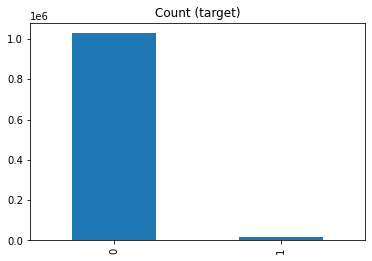

In [19]:
target_count = df['Cancelled'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');
# Class count
count_class_0, count_class_1 = df['Cancelled'].value_counts()

# Divide by class
df_class_0 = df[df['Cancelled'] == 0]
df_class_1 = df[df['Cancelled'] == 1]

Random over-sampling:
0    1027677
1    1027677
Name: Cancelled, dtype: int64


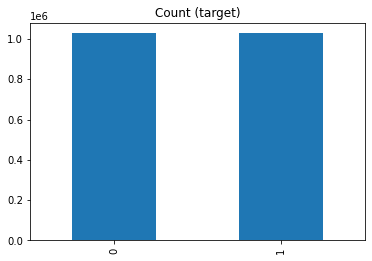

In [20]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Cancelled.value_counts())

df_test_over.Cancelled.value_counts().plot(kind='bar', title='Count (target)');

In [21]:
df_test_over.shape

(2055354, 38)

In [22]:
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import MinMaxScaler


# split the train and validation data
x = df_test_over.loc[:, df_test_over.columns != 'Cancelled']
y = df_test_over['Cancelled']

train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = .4, random_state = 1)
print(train_x.shape)

(1233212, 37)


### Feature Selection

In [23]:
from sklearn.feature_selection import mutual_info_regression

In [24]:
# determine the mutual information
mutual_info = mutual_info_regression(train_x, train_y)
mutual_info

array([0.01725891, 0.69341193, 0.12470342, 0.5959268 , 0.69323349,
       0.13151463, 0.69352089, 0.01286538, 0.69344001, 0.07522387,
       0.00408395, 0.05213149, 0.05166524, 0.10789042, 0.02255315,
       0.00995568, 0.09281613, 0.03293288, 0.09295012, 0.04283867,
       0.04513892, 0.04021784, 0.02820131, 0.02909043, 0.03951019,
       0.04190521, 0.04014943, 0.02799047, 0.02806445, 0.06230693,
       0.42528043, 0.01681656, 0.64540431, 0.06342028, 0.44594467,
       0.00689158, 0.00390995])

In [25]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_x.columns
mutual_info.sort_values(ascending=False)

AirTime                            0.693521
ActualElapsedTime                  0.693440
DepTime                            0.693412
ArrTime                            0.693233
ArrDelay                           0.645404
DepDelay                           0.595927
ArrivalDelayGroups                 0.445945
DepartureDelayGroups               0.425280
ArrDelayMinutes                    0.131515
DepDelayMinutes                    0.124703
DayofMonth                         0.107890
Flight_Number_Operating_Airline    0.092950
Flight_Number_Marketing_Airline    0.092816
Distance                           0.075224
ArrDel15                           0.063420
DepDel15                           0.062307
Quarter                            0.052131
Month                              0.051665
OriginAirportSeqID                 0.045139
OriginAirportID                    0.042839
DestAirportSeqID                   0.041905
OriginCityMarketID                 0.040218
DestCityMarketID                

<AxesSubplot:>

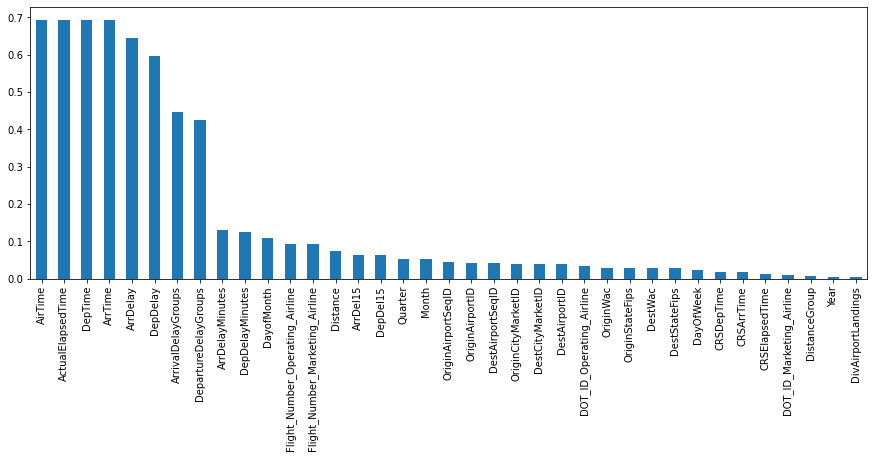

In [26]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [27]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(train_x, train_y)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000001D8C8CC70D0>)

In [28]:
selected_top_columns.get_support()

array([False,  True, False,  True,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False])

In [29]:
train_x.columns[selected_top_columns.get_support()]

Index(['DepTime', 'DepDelay', 'ArrTime', 'AirTime', 'ActualElapsedTime',
       'DepartureDelayGroups', 'ArrDelay', 'ArrivalDelayGroups'],
      dtype='object')

In [ ]:
train_x=train_x.filter(['DepTime', 'DepDelay', 'ArrTime', 'AirTime', 'ActualElapsedTime',
       'DepartureDelayGroups', 'ArrDelay', 'ArrivalDelayGroups'])

In [ ]:
val_x=val_x.filter(['DepTime', 'DepDelay', 'ArrTime', 'AirTime', 'ActualElapsedTime',
       'DepartureDelayGroups', 'ArrDelay', 'ArrivalDelayGroups'])

In [22]:
train_x

NameError: name 'train_x' is not defined

## Model 1 : Random Forest 

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(train_x, train_y)
 
# performing predictions on the test dataset
y_pred = clf.predict(val_x)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(val_y, y_pred))

NameError: name 'train_x' is not defined

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_y, y_pred)
  
print ("Confusion Matrix : \n", cm)

NameError: name 'val_y' is not defined

In [26]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(train_x) 
xtest = sc_x.transform(val_x)
print (xtrain[0:10, :])

NameError: name 'train_x' is not defined

##  MOdel 2: Logistic Regression

In [39]:
########## Split Features and Target Varible ############
X = df_test_over.loc[:, df_test_over.columns != 'Cancelled']
y = df_test_over['Cancelled']
################# Splitting into Train -Test Data #######

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =101)

In [47]:
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_test_over)
imputed_df= imputer.transform(df_test_over)

print(imputed_df)
#####################
imp_train = imputer.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

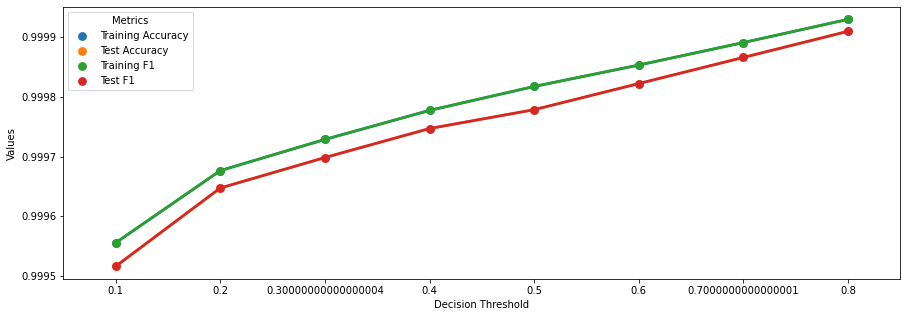

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []
#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int)
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [49]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.999747002342661
Test F1 Score:  0.9997470669494328
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,205431,104,205535
1,0,205536,205536
All,205431,205640,411071


In [51]:
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
print(model.predict_proba(X_test))
# Model accuracy on Train data
print("Model Score on Train set:",model.score(X_train, y_train))
# Model Accuracy on Test
print("Model Score on Train set:",model.score(X_test, y_test))
print("Classification Report:\n",classification_report(y_test, model_1.predict(X_test)))

[2.00663125e-07]
[[-1.50745986e-03 -9.81802852e-03 -4.91541964e-03 -4.71100661e-03
  -2.03596458e-02 -4.65340561e-03 -5.18111374e-03  3.90266153e-04
  -6.35040973e-03  6.06602606e-04  4.04938186e-04 -4.77161981e-05
  -1.43549921e-04 -1.37074410e-04 -3.06363387e-06 -5.23754552e-04
   5.74345701e-05  2.28563234e-04  1.22298737e-04  1.34778812e-07
  -1.55323161e-06  5.19805580e-04  1.60103677e-05 -2.12852727e-04
  -9.94798301e-09 -3.28258929e-07 -1.68527677e-05  2.74918342e-06
  -2.08030123e-04 -3.04100059e-05 -2.36099043e-04  3.90243091e-04
  -4.25623143e-03 -2.98759531e-05 -2.15278276e-04  2.43291271e-06
   5.45367708e-06]]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


[[1.00000000e+00 1.22091003e-18]
 [2.54071436e-04 9.99745929e-01]
 [1.39979651e-04 9.99860020e-01]
 ...
 [1.00000000e+00 1.17455087e-15]
 [7.09963969e-04 9.99290036e-01]
 [1.00000000e+00 9.28494135e-13]]
Model Score on Train set: 0.9998175496553817


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Model Score on Train set: 0.9997786270498283


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    205535
           1       1.00      1.00      1.00    205536

    accuracy                           1.00    411071
   macro avg       1.00      1.00      1.00    411071
weighted avg       1.00      1.00      1.00    411071



## Model 3: GaussianNB

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_x, train_y)

GaussianNB()

In [53]:
print("Naive Bayes score: ",nb.score(val_x, val_y))

Naive Bayes score:  1.0


## Model 4: Decision Tree 

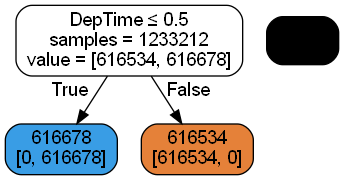

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
# fit the tree
fulltree = DecisionTreeClassifier(random_state=2)
fulltree.fit(train_x, train_y)

# plot the tree
plotDecisionTree(fulltree, feature_names=train_x.columns)


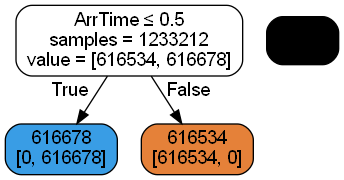

In [55]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20,
min_impurity_decrease=0.01, random_state=1)
smallClassTree.fit(train_x, train_y)
plotDecisionTree(smallClassTree, feature_names=train_x.columns)

In [56]:
classificationSummary(train_y, smallClassTree.predict(train_x))
classificationSummary(val_y, smallClassTree.predict(val_x))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 616534      0
     1      0 616678
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 411143      0
     1      0 410999


In [57]:
# Start with an initial guess for parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
'max_depth': [20, 40],
'min_samples_split': [20, 60,100],
'min_impurity_decrease': [0, 0.001, 0.01],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5,n_jobs=-1) # n_jobs=-1 will utilize all available CPUs
gridSearch.fit(train_x, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)


Initial score:  1.0
Initial parameters:  {'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [58]:
# # Adapt grid based on result from initial grid search
# param_grid = {
# 'max_depth': list(range(17, 23)), # 10 values
# 'min_samples_split': list(range(10, 25)), # 11 values
# 'min_impurity_decrease': [0.0001,  0.001], # 3 values
# }
# gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5,
# n_jobs=-1)
# gridSearch.fit(train_x, train_y)
# print('Improved score: ', gridSearch.best_score_)
# print('Improved parameters: ', gridSearch.best_params_)
# bestClassTree = gridSearch.best_estimator_



Improved score:  1.0
Improved parameters:  {'max_depth': 17, 'min_impurity_decrease': 0.0001, 'min_samples_split': 10}


In [59]:
# Adapt grid based on result from initial grid search
param_grid = {
'max_depth': list(range(1, 17)), # 10 values
'min_samples_split': list(range(2, 10)), # 11 values
'min_impurity_decrease': [0.00005,  0.0001], # 3 values
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5,
n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_


Improved score:  1.0
Improved parameters:  {'max_depth': 1, 'min_impurity_decrease': 5e-05, 'min_samples_split': 2}


In [60]:
#fine-tuned tree: training
classificationSummary(train_y, bestClassTree.predict(train_x))


Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 616534      0
     1      0 616678


In [61]:
# fine-tuned tree: validation
classificationSummary(val_y, bestClassTree.predict(val_x))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual      0      1
     0 411143      0
     1      0 410999


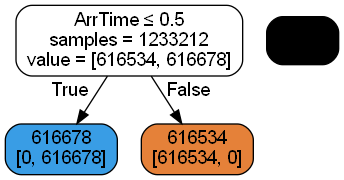

In [62]:
plotDecisionTree(bestClassTree, feature_names=train_x.columns)

In [ ]:
y_pred_probs = lbestClassTree.predict_proba(val_x)[:, 1]

In [ ]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()